In [1]:
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.legend()
    plt.show()
    plt.close()

def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [5]:
file = "automovil_clean.csv"
df = pd.read_csv(file)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo,convertible,hardtop,hatchback,sedan,wagon,price
0,0,3,122,alfa-romero,gas,two,convertible,rwd,front,88.6,...,0,1,1,0,1,0,0,0,0,13495
1,1,3,122,alfa-romero,gas,two,convertible,rwd,front,88.6,...,0,1,1,0,1,0,0,0,0,16500
2,2,1,122,alfa-romero,gas,two,hatchback,rwd,front,94.5,...,0,1,1,0,0,0,1,0,0,16500
3,3,2,164,audi,gas,four,sedan,fwd,front,99.8,...,0,1,1,0,0,0,0,1,0,13950
4,4,2,164,audi,gas,four,sedan,4wd,front,99.4,...,0,1,1,0,0,0,0,1,0,17450


In [6]:
df1 = df[["horsepower", "engine-size", "highway-L/100km", "city-L/100km", "bore", "drive-wheels", "curb-weight","length","width","wheel-base","price"]]
var_list = df1.columns.to_list()
Hp,ES,HL,CL,Br,DW,CW,L,W,WB = var_list[0],var_list[1],var_list[2],var_list[3],var_list[4],var_list[5],var_list[6],var_list[7],var_list[8],var_list[9]
price = var_list[10]


In [7]:
y_data = df[price]
x_data = df1.drop(price, axis = 1)
x_data.head()

,horsepower,engine-size,highway-L/100km,city-L/100km,bore,drive-wheels,curb-weight,length,width,wheel-base
0,111,130,10.518519,13.523810,3.47,rwd,2548,0.811148,0.890278,88.6
1,111,130,10.518519,13.523810,3.47,rwd,2548,0.811148,0.890278,88.6
2,154,152,10.923077,14.947368,2.68,rwd,2823,0.822681,0.909722,94.5
3,102,109,9.466667,11.833333,3.19,fwd,2337,0.848630,0.919444,99.8
4,115,136,12.909091,15.777778,3.19,4wd,2824,0.848630,0.922222,99.4


In [8]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data, train_size = 0.7, random_state = 0) 

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
print(x_train.shape)
print(x_test.shape)

(140, 10)
(61, 10)


In [11]:
lr = LinearRegression()
lr.fit(x_train[[Hp]],y_train)

LinearRegression()

In [12]:
print(lr.score(x_train[[Hp]], y_train))
print(lr.score(x_test[[Hp]], y_test))

0.5967552540041712
0.6959400486771934


In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
# Average R square for each fold (4)

Rcross = cross_val_score(lr,x_data[[Hp]],y_data, cv = 4)
Rcross

array([0.77465419, 0.51718424, 0.74814454, 0.04825398])

In [15]:
print("Mean: ", Rcross.mean(),"\nStandard Deviation: ",Rcross.std())
print("Negative mean squared error:", cross_val_score(lr,x_data[[Hp]],y_data, cv = 4, scoring = "neg_mean_squared_error"))


Mean:  0.5220592359225413 
Standard Deviation:  0.29130480666118463
Negative mean squared error: [-20251357.7835463  -43743920.05390439 -12525158.34507633
 -17564549.69976654]


In [16]:
from sklearn.model_selection import cross_val_predict

In [17]:
y_hat = cross_val_predict(lr, x_data[[Hp]], y_data, cv=4)
y_hat[:5]

array([14142.23793549, 14142.23793549, 20815.3029844 , 12745.549902  ,
       14762.9881726 ])

In [18]:
mlr = LinearRegression()
mlr.fit(x_train[[Hp,ES,CW,HL]], y_train)

LinearRegression()

In [19]:
yhat_train = mlr.predict(x_train[[Hp,ES,CW,HL]]) 
yhat = mlr.predict(x_test[[Hp,ES,CW,HL]])
#yhat_train = -1*yhat_train

In [20]:
import seaborn as sns

/home/rocko/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/rocko/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


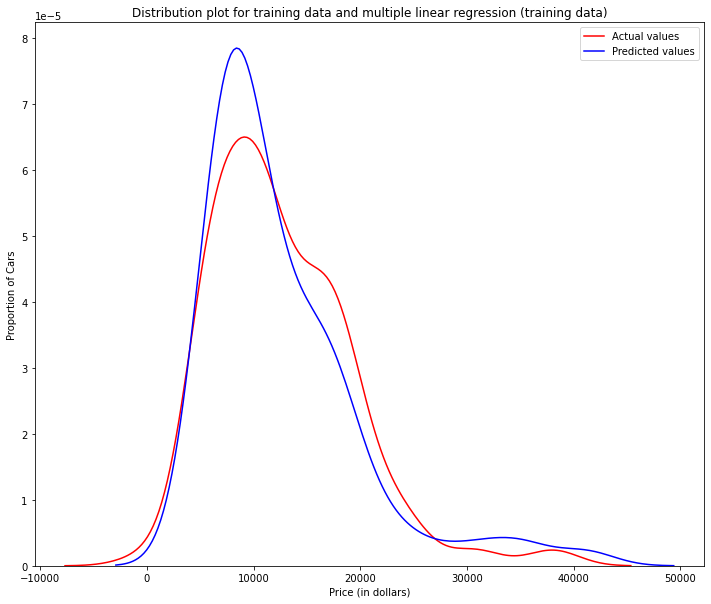

In [21]:
title = "Distribution plot for training data and multiple linear regression (training data)"
DistributionPlot(yhat_train, y_train, "Actual values" , "Predicted values", title)

/home/rocko/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/rocko/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


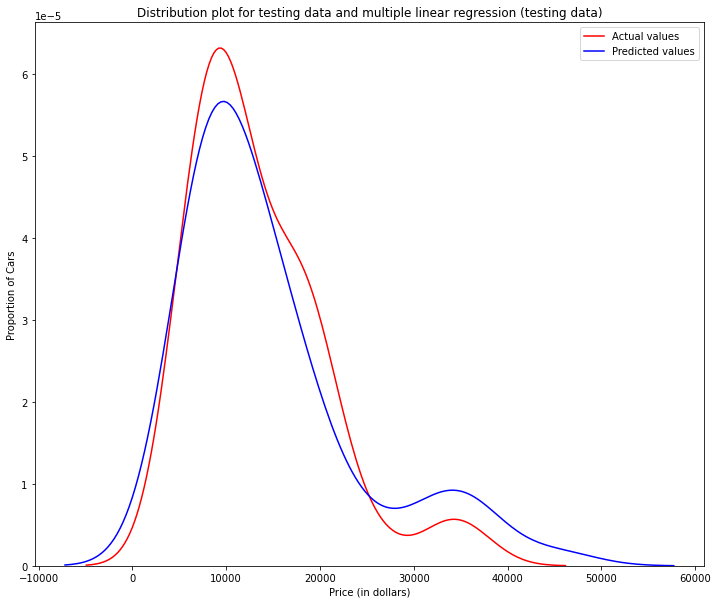

In [22]:
title = "Distribution plot for testing data and multiple linear regression (testing data)"
DistributionPlot(yhat, y_test, "Actual values" , "Predicted values", title)

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data, train_size = 0.65, random_state = 0)

In [25]:
pr = PolynomialFeatures(degree = 5)
pr_train =pr.fit_transform(x_train[[Hp,CW]])
pr_test = pr.fit_transform(x_test[[Hp,CW]])


In [26]:
poly_reg = LinearRegression()
poly_reg.fit(pr_train,y_train)

LinearRegression()

In [27]:
Yhat = poly_reg.predict(pr_test)

Yhat[:5]

array([ 6839.08460343,  7531.51754824,  7401.23944981, 16993.31385361,
       18211.81325556])

In [28]:
pr1 = PolynomialFeatures(degree=5)
x_pr_train = pr1.fit_transform(x_train[[Hp]])
x_pr_test = pr1.fit_transform(x_test[[Hp]])
poly = LinearRegression()
poly.fit(x_pr_train,y_train)

LinearRegression()

In [29]:
print("Predicted values:", Yhat[:4])
print("Actual values:", y_test[:4].values)

Predicted values: [ 6839.08460343  7531.51754824  7401.23944981 16993.31385361]
Actual values: [ 6295 10698 13860 13499]


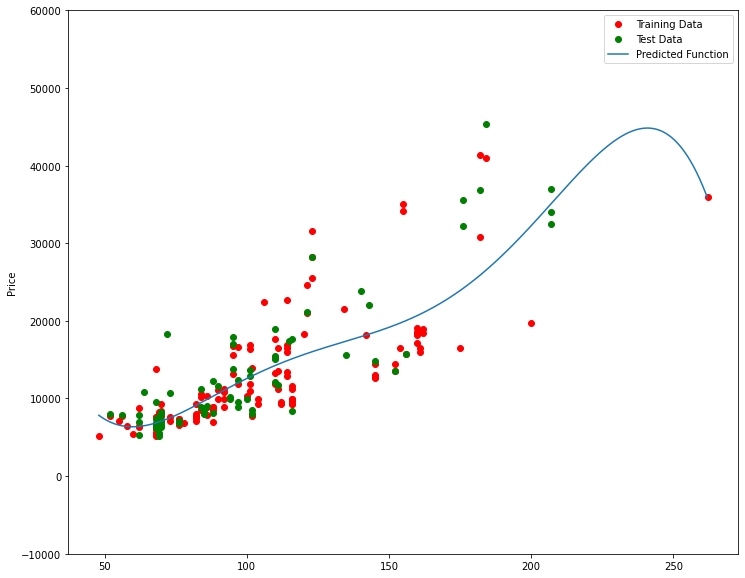

In [30]:
PollyPlot(x_train[[Hp]], x_test[[Hp]], y_train, y_test, poly,pr1)

In [31]:
R_2_test=[]
order=[1,2,3,4,5,6]
for n in order:
    pr = PolynomialFeatures(degree=n)
    pr_train = pr.fit_transform(x_train[[Hp]])
    pr_test = pr.fit_transform(x_test[[Hp]])
    lr.fit(pr_train,y_train)
    R_2_test.append(lr.score(pr_test,y_test))


Text(0, 0.5, 'R^2')

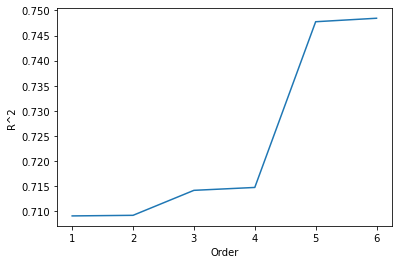

In [32]:
plt.plot(order,R_2_test)
plt.xlabel("Order")
plt.ylabel("R^2")

In [33]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[[Hp]])
    x_test_pr = pr.fit_transform(x_test[[Hp]])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[[Hp]], x_test[[Hp]], y_train,y_test, poly, pr)

In [35]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data, train_size = 0.6, random_state = 0)

In [37]:
from sklearn.linear_model import Ridge

In [38]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[[Hp, CW, ES, HL, CL, WB, Br, L, W]])
x_test_pr=pr.fit_transform(x_test[[Hp, CW, ES, HL,CL, WB, Br, L, W]])

In [39]:
RidgeModel=Ridge(alpha=1)

In [40]:
RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [41]:
yhat = RidgeModel.predict(x_test_pr)

In [42]:
print("Predicted:",Yhat[:4])
print("Real:",y_test[:4].values)

Predicted: [ 6839.08460343  7531.51754824  7401.23944981 16993.31385361]
Real: [ 6295 10698 13860 13499]


In [46]:
from tqdm import tqdm
R_2_test=[]
R_2_train=[]

alpha = 10*np.array((0,1000))
pbar = tqdm(alpha)

for n in pbar:
    RidgeModel = Ridge(alpha = n)
    RidgeModel.fit(x_train_pr,y_train)
    #RidgeModel.predict(X_pr_test)
    train_score = RidgeModel.score(x_train_pr, y_train)
    test_score = RidgeModel.score(x_test_pr, y_test)
    R_2_train.append(train_score)
    R_2_test.append(test_score)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})



100%|██████████| 2/2 [00:00<00:00,  6.66it/s, Test Score=0.739, Train Score=0.901]


In [47]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RidgeModel = Ridge(alpha=alpha) 
    RidgeModel.fit(x_train_pr, y_train)
    test_score, train_score = RidgeModel.score(x_test_pr, y_test), RidgeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:09<00:00, 104.95it/s, Test Score=0.739, Train Score=0.901]


In [48]:
data = {'R²_test': Rsqu_test, 'R²_train' :Rsqu_train} 
Rsq = pd.DataFrame(data)
print(Rsq['R²_test'].max(), Rsq['R²_train'].max())
Rsq.head()

0.7625647459758801 0.9452601634462121


,R²_test,R²_train
0,0.284553,0.945260
1,0.739386,0.920147
2,0.735987,0.918346
3,0.735600,0.917493
4,0.735970,0.916965


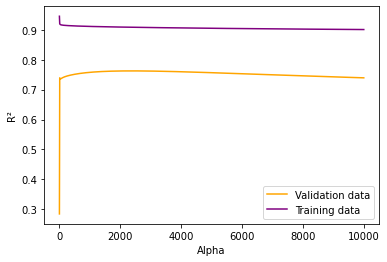

In [49]:
#% matplotlib inline

plt.plot(Alpha, Rsqu_test, 'orange', label = "Validation data")
plt.plot(Alpha, Rsqu_train, 'purple', label = "Training data")
#plt.plot(Alpha,Rsq['R²_test'].max(), 'ob')
#plt.plot(Alpha, Rsq['R²_train'].max(),'ok')
plt.ylabel("R²")
plt.xlabel("Alpha")
plt.legend()

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
parameters1 = {'alpha': [0.001,0.01,0.1,1,10,100,1000,10000,100000,1000000]}
RR = Ridge()
Grid1 = GridSearchCV(RR,parameters1,cv=4)

In [52]:
Grid1.fit(x_data[[Hp, CW, ES, HL, WB, Br,CL, L,W]], y_data)



GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,
                                   100000, 1000000]})

In [53]:
BestAlpha = Grid1.best_estimator_
BestAlpha

Ridge(alpha=10000)

In [54]:
BestAlpha.score(x_test[[Hp, CW, ES, HL, WB, Br, CL, L, W]],y_test)

0.8349277727027626

In [55]:
RR2 = Ridge()
parameters2 = [{'alpha': [0.001,0.01,0.1,1,10,100,1000,10000,100000,1000000], 'normalize': [True, False]}]
Grid2 = GridSearchCV(RR2,parameters2,cv=4)
Grid2.fit(x_data[[Hp, CW, ES, HL, WB, Br,CL, L,W]], y_data)

/home/rocko/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/home/rocko/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

/home/rocko/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/home/rocko/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/home/rocko/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will

/home/rocko/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/home/rocko/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

/home/rocko/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/home/rocko/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,
                                    100000, 1000000],
                          'normalize': [True, False]}])

In [56]:
BestRR2 = Grid2.best_estimator_
BestRR2

Ridge(alpha=1, normalize=True)

In [57]:
BestRR2.score(x_test[[Hp, CW, ES, HL, WB, Br,CL, L,W]], y_test)

0.7638972440437527